In [7]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.io import fits
import richardsplot
import pandas as pd

In [8]:
#Load the ICA weights from Paul's 6-component fitting (now for DR7)
infile = 'grdr7_180126.weights'
infoHewett = pd.read_csv(infile, sep = ' ', names=["name", "redshift", "W1", "W2", "W3", "W4", "W5", "W6", "detection", "uniform"]) #added detection for bokeh plot
infile1 = 'grdr7.radec'
infoCoords = pd.read_csv(infile1, sep = ' ', names=["name", "RA", "Dec"])

infile3 = 'grdr7_Shen2011_targ_uni.csv'
infoShen = pd.read_csv(infile3, skiprows=1, names=["name","RAx","DECx","SDSSNAME","RA","DEC","redshift","TARG_FLAG","UNI_FLAG","COLOR_FLAG","MIZ2","BALFLAGShen","FIRSTFRTYPE","FINTREST6CM","LOGFNU2500","R6CM2500A","LOGL3000","LOGL1350","Separation", "DETECTION"])

#Mask to pick out color-selected objects (ignores radio selected and NaN [non-DR7 objects])
cMask = np.array(infoShen['COLOR_FLAG'])

#This mask picks out our detections
dMask = np.array(infoShen['DETECTION'])

#Need to format weights for Scikit-Learn
weights = infoHewett[infoHewett.columns[2:8]]
#print weights
X = np.array(weights)
#print(X)

wt_dMask = np.array(infoHewett["detection"]) #targets ordered in infoHewett -- inserted manually
wt_uniMask = np.array(infoHewett["uniform"]) #uniform flag for targets only

wt_dX = X[wt_dMask==1] #find detection entries
wt_dX = wt_dX[:,:6] #reformat weights (eliminate detection column)
    
# Array of each of the 6 weights
W1 = X[:,0]
W2 = X[:,1]
W3 = X[:,2]
W4 = X[:,3]
W5 = X[:,4]
W6 = X[:,5]

W0 = X[:,0]+X[:,1]+X[:,2]+X[:,3]

#We are going to want to restrict the redshift range, do it like this.
zem = np.array(infoHewett['redshift'])

# Number with z<1.75
zmask = ((zem<=1.75))

#Read in Shen radio data
R = np.array(infoShen['R6CM2500A']).astype(float)
FIRST = np.array(infoShen['FINTREST6CM']).astype(float)

#Load old tSNE projection to start
projTSNE2 = np.load('projTSNE2.npy')

#Radio-loud mask
RLmask = (R>10)
projTSNE2rad = projTSNE2[RLmask]

#We are going to want to restrict the redshift range, do it like this.
zem = np.array(infoHewett['redshift'])

# Number with 1.55<z.1.75
zmask = ((zem>1.645)&(zem<=1.6519))

projTSNE2col = projTSNE2[cMask>0]
projTSNE2radcol = projTSNE2[(cMask>0)&(RLmask)]
projTSNE2colz = projTSNE2[(cMask>0)&(zmask)]

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in greater


In [9]:
# Find radius of circle containing 20% of the sources and plot
x0 = 0 #take center of circle to be 0,0
y0 = 0
x  = projTSNE2[:,0]
y  = projTSNE2[:,1]
# Find radial coordinate of each point
r  = np.sqrt((x - x0)**2 + (y - y0)**2)
t  = 20 # percent
# Find radius that corresponds to t percentile
r0 = np.percentile(r, t)

#Take coordinate of the 'greenest' point from this instance to compare for all

In [10]:
infoTrevor = pd.read_csv('../SpringFinalFigs_moreParams.csv')
infoTrevor.sort_values('col1', inplace=True) #sort target radio data based on Paul's data
sdss_names = infoTrevor[['name']].values.flatten()
sdss_names[np.argmax(r[zmask])] #this target is indeed the farthest away from center of the original projection
                                #want to track it to see if that remains the case throughout
    
Q0 = (infoTrevor[['Quadrant']].values.flatten() == 0)
Q1 = (infoTrevor[['Quadrant']].values.flatten() == 1)
Q2 = (infoTrevor[['Quadrant']].values.flatten() == 2)
Q3 = (infoTrevor[['Quadrant']].values.flatten() == 3)
Q4 = (infoTrevor[['Quadrant']].values.flatten() == 4)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

'Greenest' point distance from center: 82.12174224853516
(7.443211078643799,-84.14791870117188)


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


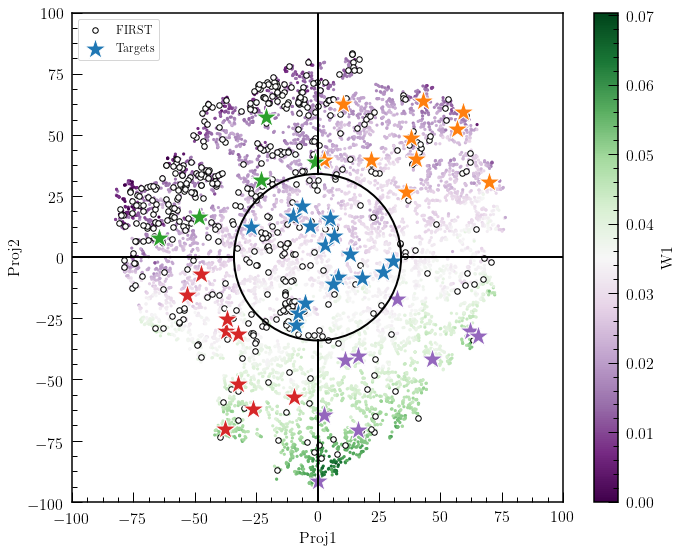

In [11]:
figure = plt.figure(figsize=(11,9))

x0 = 0 #take center of circle to be 0,0
y0 = 0
x  = projTSNE2[:,0]
y  = projTSNE2[:,1]
# Find radial coordinate of each point
r  = np.sqrt((x - x0)**2 + (y - y0)**2)
print("'Greenest' point distance from center: {}".format(r[np.argmax(W1[cMask>0])]))

#Step 1:
followx = x[np.argmax(W1)]
followy = y[np.argmax(W1)]
greenestpt = np.array(([followx, followy])) #this is the fiducial point we use to follow the distribution
norm1 = np.linalg.norm(greenestpt)

#Step2:
m = followy/followx #use vector slope to choose CW/CCW rotation later

print("({},{})".format(followx,followy))

projTSNE2col = projTSNE2[cMask>0]
projTSNE2radcol = projTSNE2[(cMask>0)&(RLmask)]
projTSNE2colz = projTSNE2[(cMask>0)&(zmask)]

plt.scatter(projTSNE2col[:,0], projTSNE2col[:,1], c=W1[cMask>0], cmap="PRGn", edgecolor="None", s=10)
plt.xlabel("Proj1")
plt.ylabel("Proj2")

cbar = plt.colorbar() 
cbar.ax.set_ylabel('W1')
plt.scatter(projTSNE2radcol[:,0], projTSNE2radcol[:,1], c='w', edgecolor='k', s=30, label="FIRST")

#Color-code targets based on which quadrant they fall in
plt.scatter(projTSNE2colz[:,0][Q0], projTSNE2colz[:,1][Q0], c=colors[0], edgecolor='w', s=500, marker='*', label="Targets")
plt.scatter(projTSNE2colz[:,0][Q1], projTSNE2colz[:,1][Q1], c=colors[1], edgecolor='w', s=500, marker='*')
plt.scatter(projTSNE2colz[:,0][Q2], projTSNE2colz[:,1][Q2], c=colors[2], edgecolor='w', s=500, marker='*')
plt.scatter(projTSNE2colz[:,0][Q3], projTSNE2colz[:,1][Q3], c=colors[3], edgecolor='w', s=500, marker='*')
plt.scatter(projTSNE2colz[:,0][Q4], projTSNE2colz[:,1][Q4], c=colors[4], edgecolor='w', s=500, marker='*')

plt.xlim(-100,100)
plt.ylim(-100,100)
plt.legend(loc="upper left")

circle=plt.Circle((0, 0), r0, color='k', fill=False, linewidth=2)
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.plot([0,0], [r0,100], c='k', linewidth=2)
plt.plot([0,0], [-r0,-100], c='k', linewidth=2)
plt.plot([r0,100], [0,0], c='k', linewidth=2)
plt.plot([-r0,-100], [0,0], c='k', linewidth=2)

Each target has its own color, defined by the quadrant it lies in from the original t-SNE projection -- now we want to 'follow' these groups of targets around more runs of t-SNE

Is it worth noting that our targets are sort of lacking along the strip where the FIRST sources are noticeably dense in the top left?  Could at least in part explain why we only detected 2/50=4% RL quasars.

---

We have the following problem: *some* of our projections are actually 'reflections' of the global struture that we are trying to maintain.  Without correcting for these reflections, it will be impossible to maintain the orientaion of our 'original' tSNE plot of the DR7 objects throughout all runs of t-SNE.

Approach: 

1) We need to first pick a point to 'follow' around from the original projection.  I chose to follow the greenest (so highest W1) since in the original projection, that point was pretty much along the y-axis, so it was easy to check if my function worked.  Save the coordinates of this point.  

2) Define an axis of the form $y=mx$ that goes through both the origin and the location of the greenest point.  This will basically be used to determine where other points are relative to the greenest point, which will be used to choose whether or not to mirror the points

3)  Begin working with new projection.  First thing to do is: find where the greenest point is in this new graph now.  Once you have that, define a new axis like above through the origin and the new greenest point (of slope 'func' in my code).

4) OK.  Now to compare where other points are relative to the greenest point in this new t-SNE projection.  The point has coordinates $(G_x,G_y)$. 
* If you go back to the original plot, imagine its axis you've defined through the greenest point and the origin. It's a steep linear function with a negative slope -- and the 'purplest' point is below that function.  If you think about it for a bit, for any projection of this orginal 'structure', if $G_x>0$ then the 'purplest' point will be below this function -- otherwise it is a reflection of the original plot.

* Now if $G_x<0$, then the purplest point will be *above* that axis that you've defined.

5) The final step is to calculate the angle between the 'original' greenest point and the 'new' greenest point -- just interpret the points' coordinates as vectors.  Then apply the rotation matrix to each point in the projection.




\begin{equation*}
R = 
\begin{pmatrix}
\cos\theta & -\sin\theta  \\
\sin\theta & \cos\theta
\end{pmatrix}
\end{equation*}

In [27]:
N = 100

# Caution -- below step takes *hours*!

In [28]:
#Generate some t-SNE projections
# t-SNE
from sklearn.manifold import TSNE

projections = []

for i in range(N): #do N projections
    projection = TSNE(n_components = 2).fit_transform(X)
    projections.append(projection)

In [29]:
def orientation(projTSNE2):
    x0 = 0 #take center of circle to be 0,0
    y0 = 0
    x  = projTSNE2[:,0]
    y  = projTSNE2[:,1]
    # Find radial coordinate of each point
    r  = np.sqrt((x - x0)**2 + (y - y0)**2)
    print("'Greenest' point distance from center: {}".format(r[np.argmax(W1)]))
    
    #Step 3:
    gx = x[np.argmax(W1)] #x-coord of greenest point in new projection
    gy = y[np.argmax(W1)] #y-coord of greenest point
    gpt = np.array([gx,gy])
    norm2 = np.linalg.norm(gpt) #save how far away it is
    func = (gy/gx) #line through origin and greenest pt -- normalization may not be right

    #Step 4:
    #This basically runs through the cases to checkif we need to 'mirror' our data along 'func'
    #Ideally we'd just reflect with projection*-func, but that messes up the scaling
    if gx > 0:
        if y[np.argmin(W1)] > func*x[np.argmin(W1)]:
            projTSNE2[:,0] *= -1.0 #mirror the new points if needed
    elif gx < 0:
        if y[np.argmin(W1)] < func*x[np.argmin(W1)]:
            projTSNE2[:,0] *= -1.0
    print("({},{})".format(gx,gy))

    #Step 5:
    #Calculate angle between greenest points in each orientation and apply rotation matrix
    A = np.dot(greenestpt,gpt) / (norm1*norm2)
    if abs(A) > 1: A=1 #correct for machine precision error, if necessary
    theta = np.arccos(A)
    if gy > m*gx: theta = 2*np.pi - theta #if point above original 'slope', want to effectively rotate CW, rather than CCW
    R = np.array(([np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]))
    for i in range(len(projTSNE2)): projTSNE2[i] = np.matmul(R, projTSNE2[i]) #apply rotation matrix to each pt in projection
    
    return projTSNE2

In [30]:
for j in range(N):
    projections[j] = orientation(projections[j])

'Greenest' point distance from center: 81.9787368774414
(72.05938720703125,-39.089111328125)
'Greenest' point distance from center: 81.76484680175781
(-80.36363983154297,15.072367668151855)
'Greenest' point distance from center: 82.37667083740234
(40.50156784057617,71.73241424560547)
'Greenest' point distance from center: 82.04033660888672
(-62.00657272338867,53.71965789794922)
'Greenest' point distance from center: 81.35200500488281
(67.0185546875,-46.11574172973633)
'Greenest' point distance from center: 82.43910217285156
(-22.190610885620117,79.3963623046875)
'Greenest' point distance from center: 82.34534454345703
(-19.716039657592773,79.9501953125)
'Greenest' point distance from center: 84.23273468017578
(-84.2301254272461,0.6631288528442383)
'Greenest' point distance from center: 83.29460144042969
(-9.557430267333984,-82.74446868896484)
'Greenest' point distance from center: 81.76414489746094
(-71.28056335449219,-40.055667877197266)
'Greenest' point distance from center: 81.80496

'Greenest' point distance from center: 80.36116027832031
(-60.68427276611328,52.68144989013672)
'Greenest' point distance from center: 83.93921661376953
(7.483037948608398,83.60499572753906)
'Greenest' point distance from center: 80.82377624511719
(34.119773864746094,73.26885223388672)
'Greenest' point distance from center: 84.1470718383789
(4.769377708435059,-84.01180267333984)


Some small (but noticeable) changes in location of some points, but overall structure maintained.

In [31]:
avgTSNE = np.array(([])).reshape(0,2)
point = np.array(([])).reshape(0,2)

for i in range(len(projTSNE2)):
    for proj in projections:
        point = np.vstack((point, proj[i]))
    
    avgTSNE = np.vstack((avgTSNE, np.median(point, axis=0)))
    point = np.array(([])).reshape(0,2)

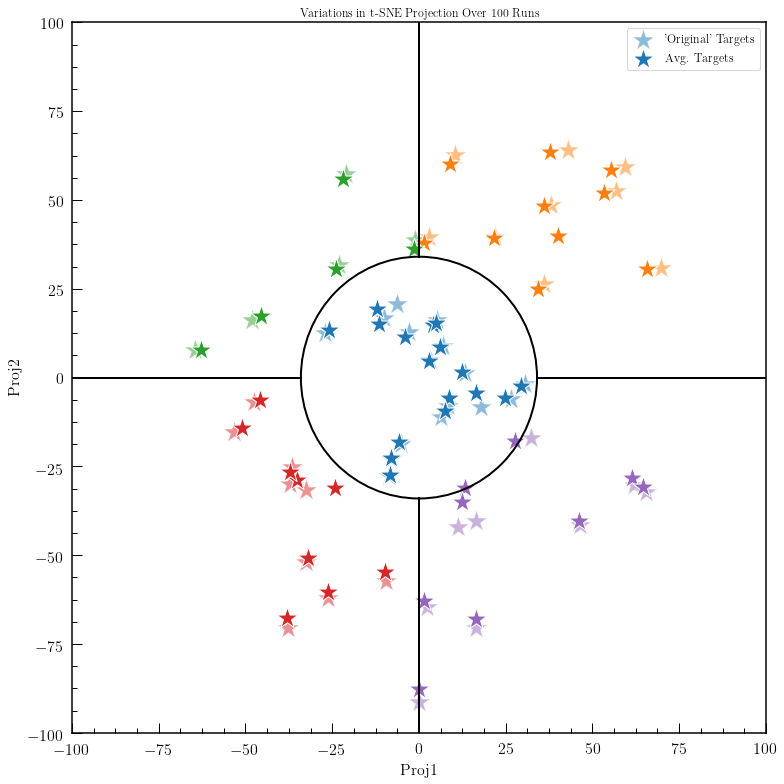

In [33]:
figure = plt.figure(figsize=(11,11))

avg_projTSNE2colz = avgTSNE[(cMask>0)&(zmask)]

plt.xlabel("Proj1")
plt.ylabel("Proj2")

#Color-code targets based on which quadrant they fall in
plt.scatter(projTSNE2colz[:,0][Q0], projTSNE2colz[:,1][Q0], c=colors[0], edgecolor='w', s=500, alpha=0.5, marker='*', label="'Original' Targets")
plt.scatter(projTSNE2colz[:,0][Q1], projTSNE2colz[:,1][Q1], c=colors[1], edgecolor='w', s=500, alpha=0.5, marker='*')
plt.scatter(projTSNE2colz[:,0][Q2], projTSNE2colz[:,1][Q2], c=colors[2], edgecolor='w', s=500, alpha=0.5, marker='*')
plt.scatter(projTSNE2colz[:,0][Q3], projTSNE2colz[:,1][Q3], c=colors[3], edgecolor='w', s=500, alpha=0.5, marker='*')
plt.scatter(projTSNE2colz[:,0][Q4], projTSNE2colz[:,1][Q4], c=colors[4], edgecolor='w', s=500, alpha=0.5, marker='*')

plt.scatter(avg_projTSNE2colz[:,0][Q0], avg_projTSNE2colz[:,1][Q0], c=colors[0], edgecolor='w', s=500, marker='*', label="Avg. Targets")
plt.scatter(avg_projTSNE2colz[:,0][Q1], avg_projTSNE2colz[:,1][Q1], c=colors[1], edgecolor='w', s=500, marker='*')
plt.scatter(avg_projTSNE2colz[:,0][Q2], avg_projTSNE2colz[:,1][Q2], c=colors[2], edgecolor='w', s=500, marker='*')
plt.scatter(avg_projTSNE2colz[:,0][Q3], avg_projTSNE2colz[:,1][Q3], c=colors[3], edgecolor='w', s=500, marker='*')
plt.scatter(avg_projTSNE2colz[:,0][Q4], avg_projTSNE2colz[:,1][Q4], c=colors[4], edgecolor='w', s=500, marker='*')

plt.xlim(-100,100)
plt.ylim(-100,100)
plt.legend(loc="best")

circle=plt.Circle((0, 0), r0, color='k', fill=False, linewidth=2)
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.plot([0,0], [r0,100], c='k', linewidth=2)
plt.plot([0,0], [-r0,-100], c='k', linewidth=2)
plt.plot([r0,100], [0,0], c='k', linewidth=2)
plt.plot([-r0,-100], [0,0], c='k', linewidth=2)

plt.title("Variations in t-SNE Projection Over {} Runs".format(N))
plt.tight_layout()
plt.savefig("tSNEvariations_{}x.pdf".format(N))